In [1]:
import numpy as np
import itk
import matplotlib.pyplot as plt
import seaborn as sns
import gatetools as gt
import pandas as pd

In [2]:
df = pd.read_csv("ROITable.csv")

In [3]:
df

,Unnamed: 0,Glande_Lacrim_D,Glande_Lacrim_G,Glnd_Submand_L,Parotid_R,Glnd_Submand_R,Parotid_L
0,0,905.0,948.0,9634.0,29455.0,9423.0,28533.0
1,1,1220.0,1044.0,8678.0,24502.0,9267.0,23600.0
2,2,873.0,806.0,7209.0,33928.0,7763.0,33035.0
3,3,848.0,805.0,13769.0,42290.0,11291.0,44164.0
4,4,720.0,839.0,5978.0,19689.0,7231.0,16063.0
5,5,828.0,926.0,8366.0,33064.0,7740.0,35419.0
6,6,1361.0,806.0,9215.0,28451.0,9183.0,26485.0
7,7,1067.0,1186.0,8974.0,26886.0,6718.0,25290.0
8,8,1410.0,704.0,8683.0,26183.0,9928.0,26967.0
9,9,1038.0,815.0,6612.0,34891.0,9278.0,35611.0


In [4]:
df = df.drop(columns="Unnamed: 0",axis=0)

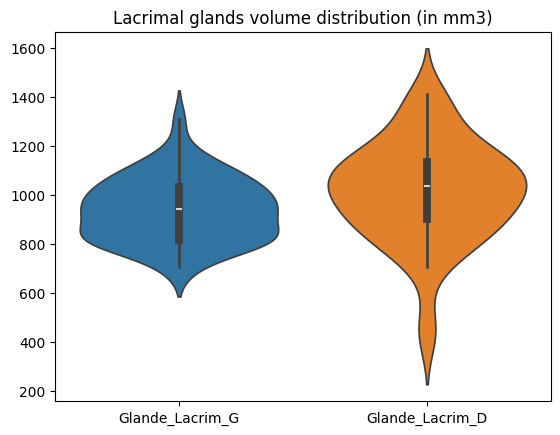

In [5]:
sns.violinplot(data=(df["Glande_Lacrim_G"], df["Glande_Lacrim_D"]))
plt.title("Lacrimal glands volume distribution (in mm3)")
plt.show()

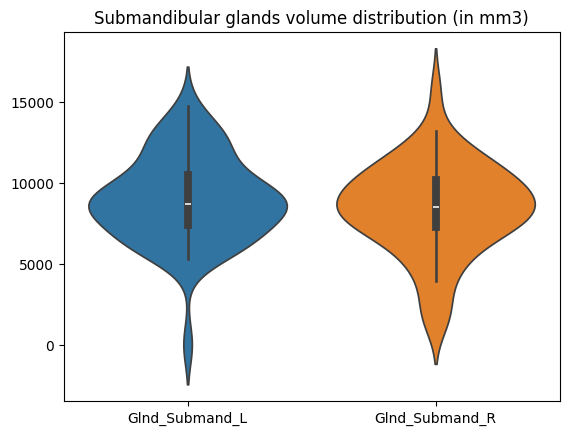

In [6]:
sns.violinplot(data=(df["Glnd_Submand_L"] ,df["Glnd_Submand_R"]))
plt.title("Submandibular glands volume distribution (in mm3)")
plt.show()

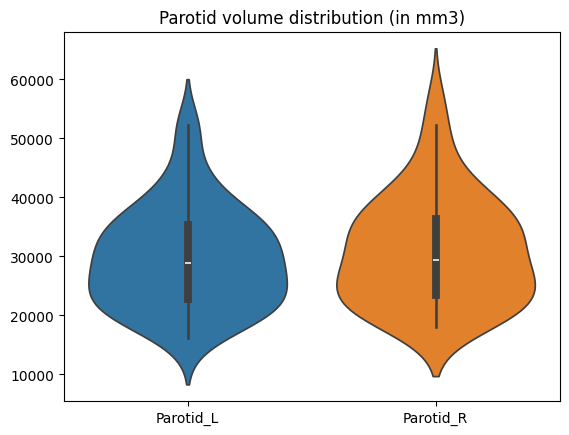

In [7]:
sns.violinplot(data=(df["Parotid_L"],df["Parotid_R"]))
plt.title("Parotid volume distribution (in mm3)")
plt.show()

In [8]:
per = pd.array((sum(df["Glande_Lacrim_D"]),
                sum(df["Glande_Lacrim_G"]),
                sum(df["Glnd_Submand_L"]),
                sum(df["Parotid_R"]),
                sum(df["Glnd_Submand_R"]),
                sum(df["Parotid_L"])))

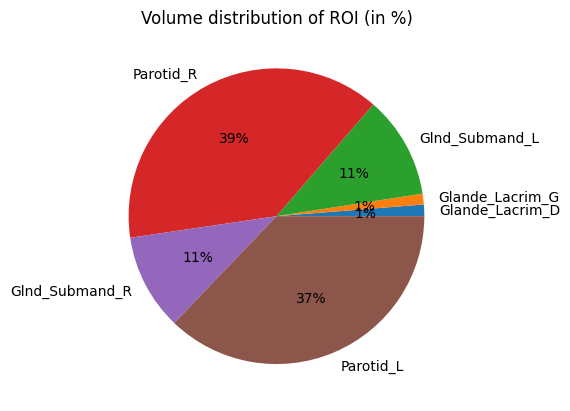

In [9]:
plt.pie(x=per, labels=df.columns, autopct='%1.0f%%')
plt.title("Volume distribution of ROI (in %)")
plt.show()

In [10]:
density = itk.imread("/home/bcatez/data/Dataset003_glands/imagesTr/p001_psma_0000.nii.gz")

In [11]:
density = itk.GetArrayViewFromImage(density)

In [12]:
density.mean()

NDArrayITKBase(-929.5618, dtype=float32)

In [36]:
densi_test = (density[density > -250])
densi_test = densi_test[densi_test < 250]

In [37]:
densi_test.mean()

NDArrayITKBase(-1.3358393, dtype=float32)

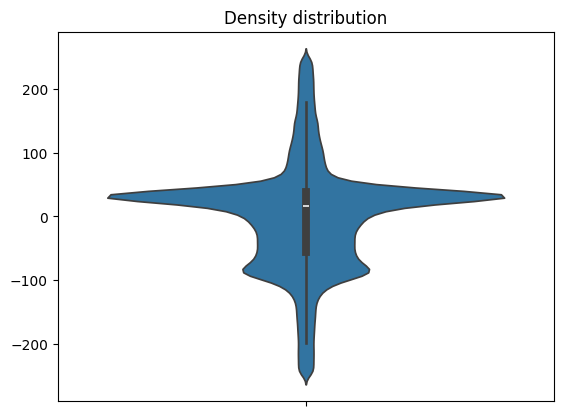

In [41]:
sns.violinplot(pd.Series(densi_test))
plt.title("Density distribution")
plt.show()